## Text Analysis with NLTK and Tableau Visualizations

As a Data Analyst, BI Analyst, Data Miner, ML Engineer, etc. text analysis could result in one of the handiest tools of your toolbox. In simple words, text analysis is about parsing a string or text file with the objective of extracting key characteristics, facts, or trends from within the context. 

>"Using Text Analysis is one of the first steps in many data-driven approaches, as the process extracts machine-readable facts from large bodies of texts and allows these facts to be further entered automatically into a database or a spreadsheet. The database or the spreadsheet are then used to analyze the data for trends, to give a natural language summary, or may be used for indexing purposes in Information Retrieval applications" [ontotext.com](https://www.ontotext.com/knowledgehub/fundamentals/text-analysis/)

#### Example:
*Given unstructured text data, process the data, and create valuable business analytics.  Create a managerial report identifying the patterns and recommendations uncovered in the data.* 

You want to choose readily available text which recurred over at least three time periods, spaced some distance apart. You want to make sure you have at least several thousand words of text for each time period, and you want something which will change noticeably over that time period. 

For this example, I've selected the U.S. National Security Strategy for the years of [1996](https://nssarchive.us/wp-content/uploads/2020/04/1996.pdf), [2002](https://nssarchive.us/wp-content/uploads/2020/04/1996.pdf), and [2017](http://nssarchive.us/wp-content/uploads/2020/04/2017.pdf). 

>##### Text analysis is about parsing a string or text file with the objective of extracting characteristics, facts, or trends from the context. 

__1st Step:__  Open the text file (ie., nss1996.txt), create basic counters, and dictionary, split the lines as words, and lowercase all contained words. Note: Starter Code - Based on Toby Donaldson's Python: Visual QuickStart Guide function print_file_stats (location 5347). Modified by OC on 7 Jul 2020

Program to open a text file named 'nss1996.txt' give a word count of all the words in the file and give the top 30 words. Note: This code assumes the following have been imported:
- import string
- import nltk
- nltk.download('stopwords')
- from nltk.corpus import stopwords

    fhand = open('nss1996.txt', 'r').read()   #open the file
    num_chars = len(fhand)                    #count characters 
    num_lines = fhand.count('\n')             #count lines
    d = dict()                                #create a list
    words = fhand.split()                     #split lines
    words = [word.lower() for word in words]  #lowercase words
---

__2nd Step:__ Filter out punctuation, stop words, and any other additional word not excluded by NLTK stop-words.

    # extra junky or particular words to exclude
    words = [word.replace('united','') for word in words]
    words = [word.replace('states','') for word in words]
    words = [word.replace('also','') for word in words]
    words = [word.replace('use','') for word in words]
    words = [word.replace('make','') for word in words]
    words = [word.replace('must','') for word in words]
    words = [word.replace('new','') for word in words]
    words = [word.replace('every','') for word in words]
    # filter out punctuation 
    words = [word for word in words if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
---

__3rd Step:__ Set the if-else loop to capture unique words, and count them. Update the number of words total and append new words to the list. Establish your print statements and list format, in my case, I wan the top-30 words. 

    # Set the if-else loop to capture unique words, and count them. 
    # Update number of words total, and append new words to the list. st. s = sum(d[w] for w in d)

    lst = [(d[w], w) for w in d]
    lst.sort()
    lst.reverse()

    print('Total number of characters = ' + str(num_chars))
    print('Total number of lines = ' + str(num_lines))
    print('Total number of words = ' + str(num_words))

    print('\n The 30 most frequent words are: \n')

    i = 1
    for count, word in lst[:30]:
        print('%2s.  %4s %s' % (i, count, word))
        i += 1

    Total number of characters = 207517
    Total number of lines = 642
    Total number of words = 14350

     The 30 most frequent words are: 

     1.   151 security
     2.   134 international
     3.   128 economic
     4.    96 military
     5.    96 forces
     6.    88 peace
     7.    80 American
     8.    77 support
     9.    74 national
    10.    69 nations ...

Note: Repeat the process for your alternate text files.  Aggregate your generated lists, in my case, I combined my three lists as a CSV file under the following headings, then imported into Tableau. 

#### Executive Summary Excerpt  

The analysis highlights some of the priorities and lines of efforts of the United States between 1996 and 2017.  Three central conclusions are evident in this assessment: 1. The U.S. pivoted from a cold-war era to a global war on terrorism, to homeland-focused.  2. There was a shift of priorities immediately after the September 11, 2001, Word Trade Center attack.  3. For the last 3 years, the U.S. has shifted between its mission areas, moving from previous administrations’ foreign policies and strategies like global trade and world politics to America-centric and new economic goals.  

Driven by these findings, absence of words across these reports, and perceived inclinations, the immediate recommendations include  1. To reassess the U.S. Government posture in relation to the international community and avoid complete isolation, which could further cripple the international order.  2. To reassess its current stance in relation to the North Atlantic Treaty Organization objectives.  3.  To deliberately re-engage supporting fair and equitable human-rights and democratic processes across the globe, knowing that “the progress of the American people relies on a balanced world”.  

The first depiction of recurring words across these NSS reports (figure 1.0) exemplifies key-policy differences between these years.Case in point, the 1996 NSS accentuates economic, international, and military-forces, while 2002, is most predominant on global, trade, and international. Subsequently, in 2017, economic re-appears, along with American, and partners.

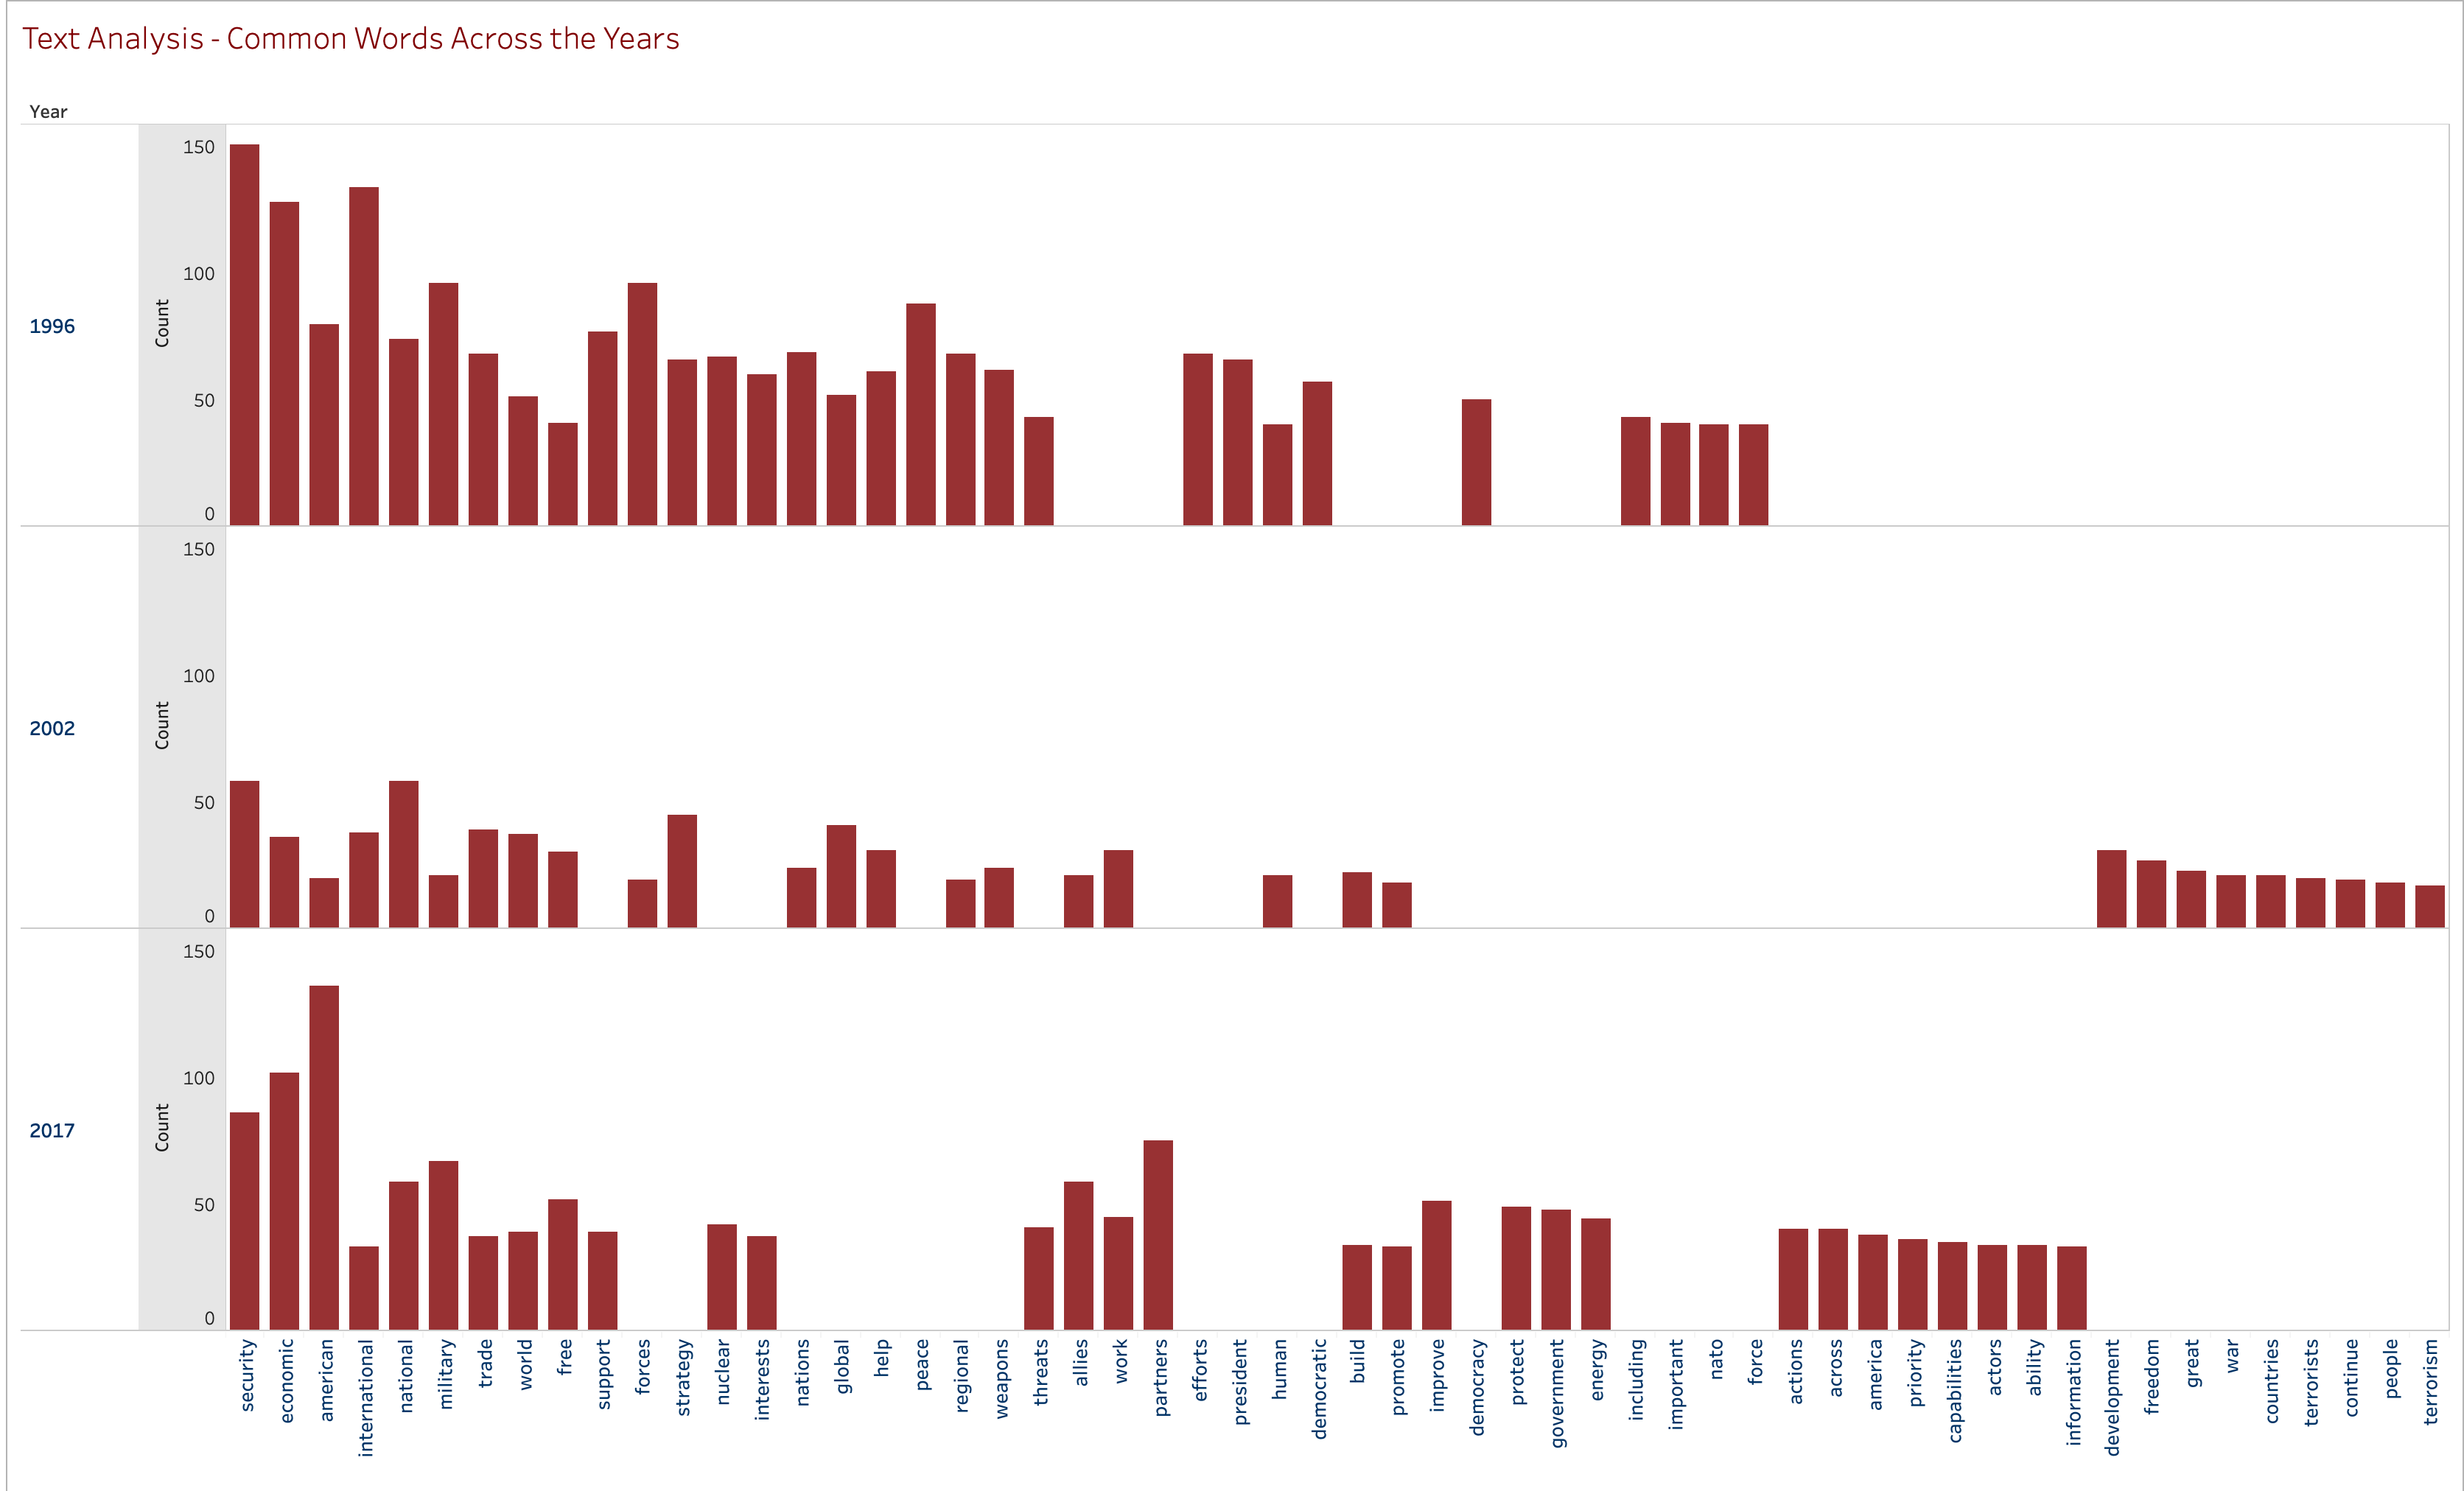

In [1]:
from IPython.display import Image
Image(filename='../GitHub/portfolio/text_analysis/images/image1.png', width= 940)

__Figure 1.0__ - *A substantial shift of language between the encompassing three-period strategies, particularly, from the “international” sphere to the “American” arena*. 

These three periods can get explained considering historical events.  For instance, around 1996, the U.S. was reemerging from a lengthy Cold-war era.  Some of the main priorities included economic restoration, international talks, and free-trade expansion.  Around 2002, the nation was in the midst of a global war on terrorism (GWOT), while during 2017, the attention was shifted toward the economy and the protection of the homeland. 

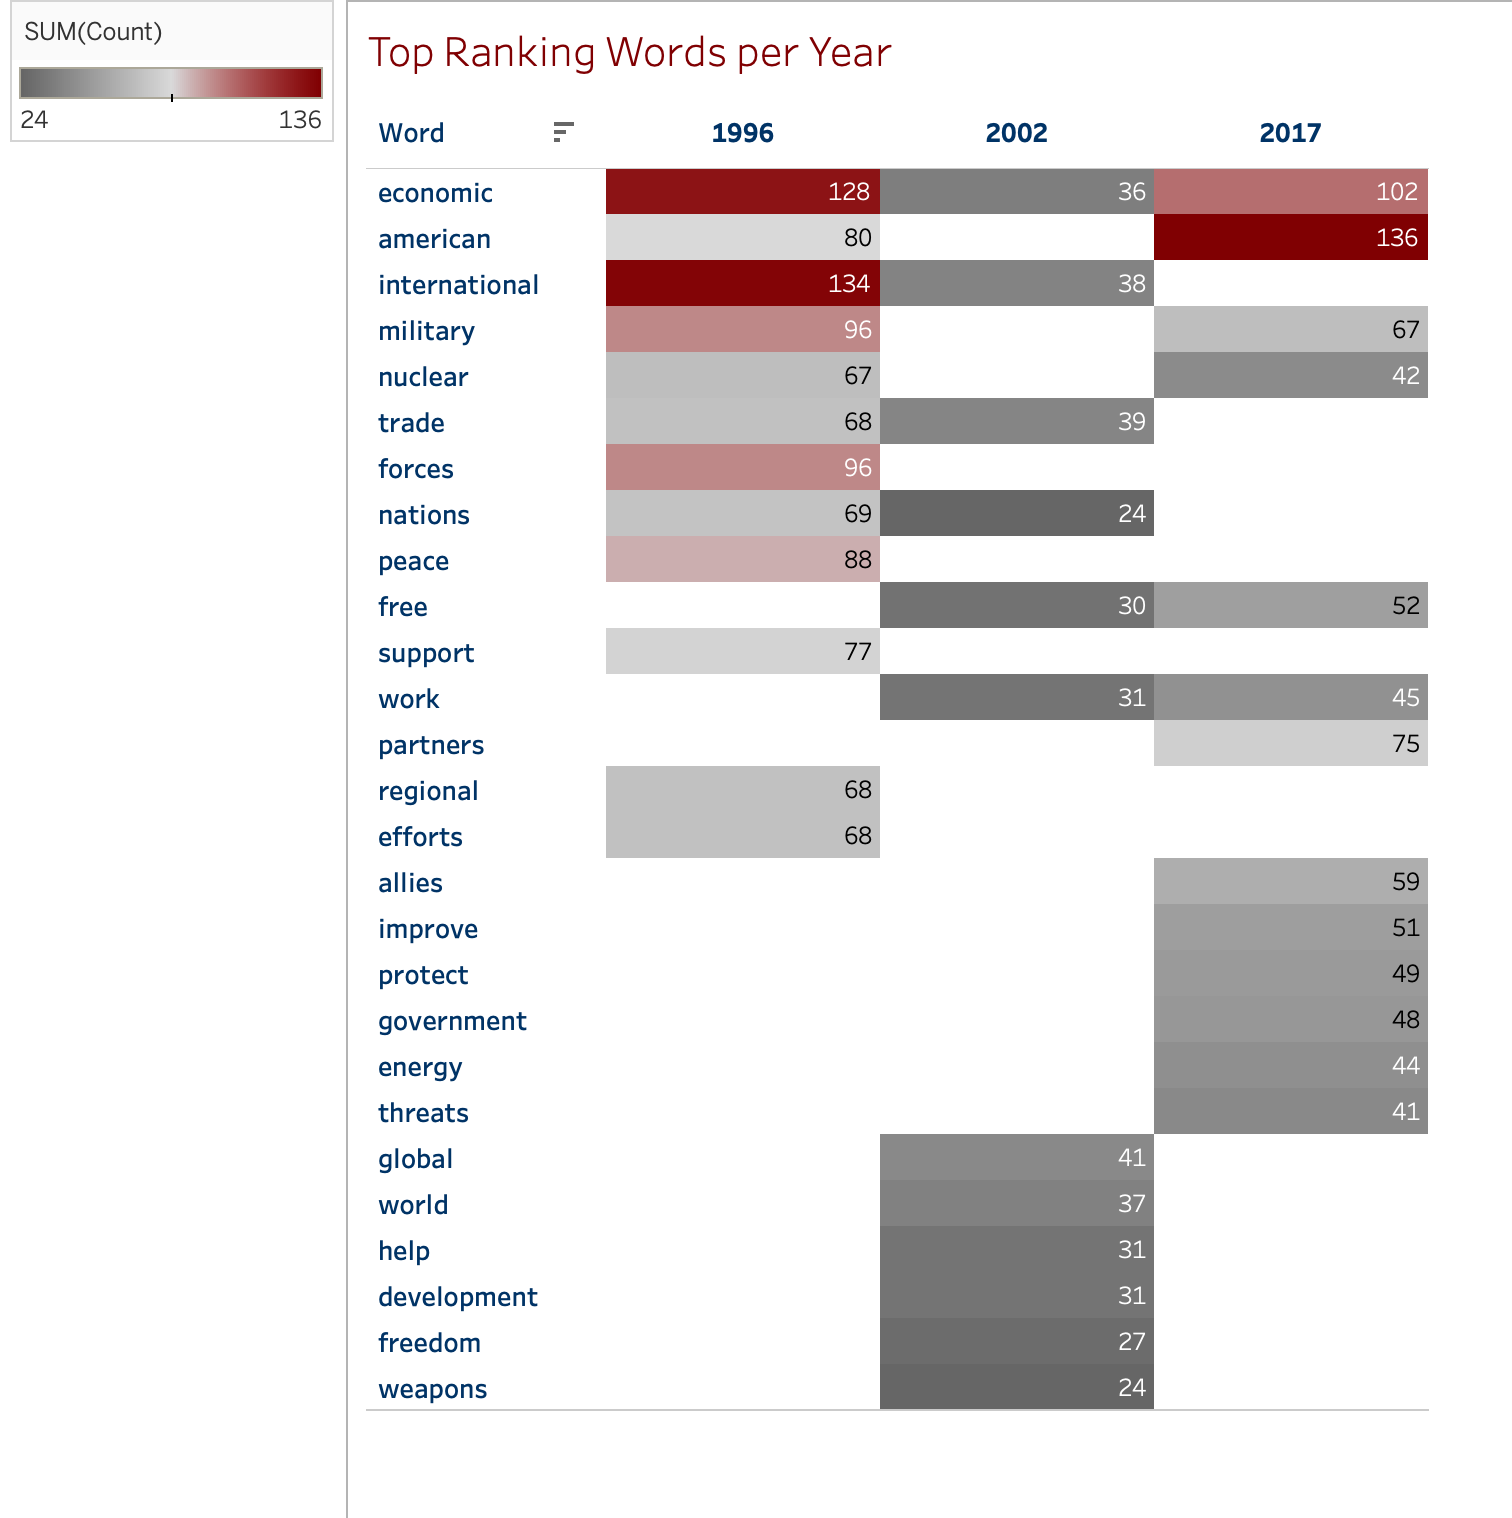

In [2]:
Image(filename='../GitHub/portfolio/text_analysis/images/image2.png', width= 700)

__Figure 1.1__
*The word, “American” moved from a total count of 80 in 1996 to 136 in 2017, while “economic” resurfaces in 2017 with a stronger prominence in relation to 2002 NSS.*

Consequently, the top-ranking words per year, as shown in figure 1.2, underlines the nation’s priorities throughout those respective periods.  For instance, in 1996 the prime subjects were around international relations, peace, supporting economic trades, nuclear, regional efforts, etc.  The 2002 strategy evokes the need for global engagement, world trade, weapons, and freedom.  Lastly, 2017 suggests a move toward the American needs and economy, partnership with allies, nuclear talks, and military readiness emphasis.

As previously alluded, the total count of the top-3 words is interesting and relevant across all of these distinctive periods; these are American, economic, and international.  The bump chart in figure 1.3, displays a security strategy evolution.  In retrospect, today’s active NSS [2017] prioritizes the word American over international and economic, which exemplifies today’s U.S. government policies, foreign or domestic. 

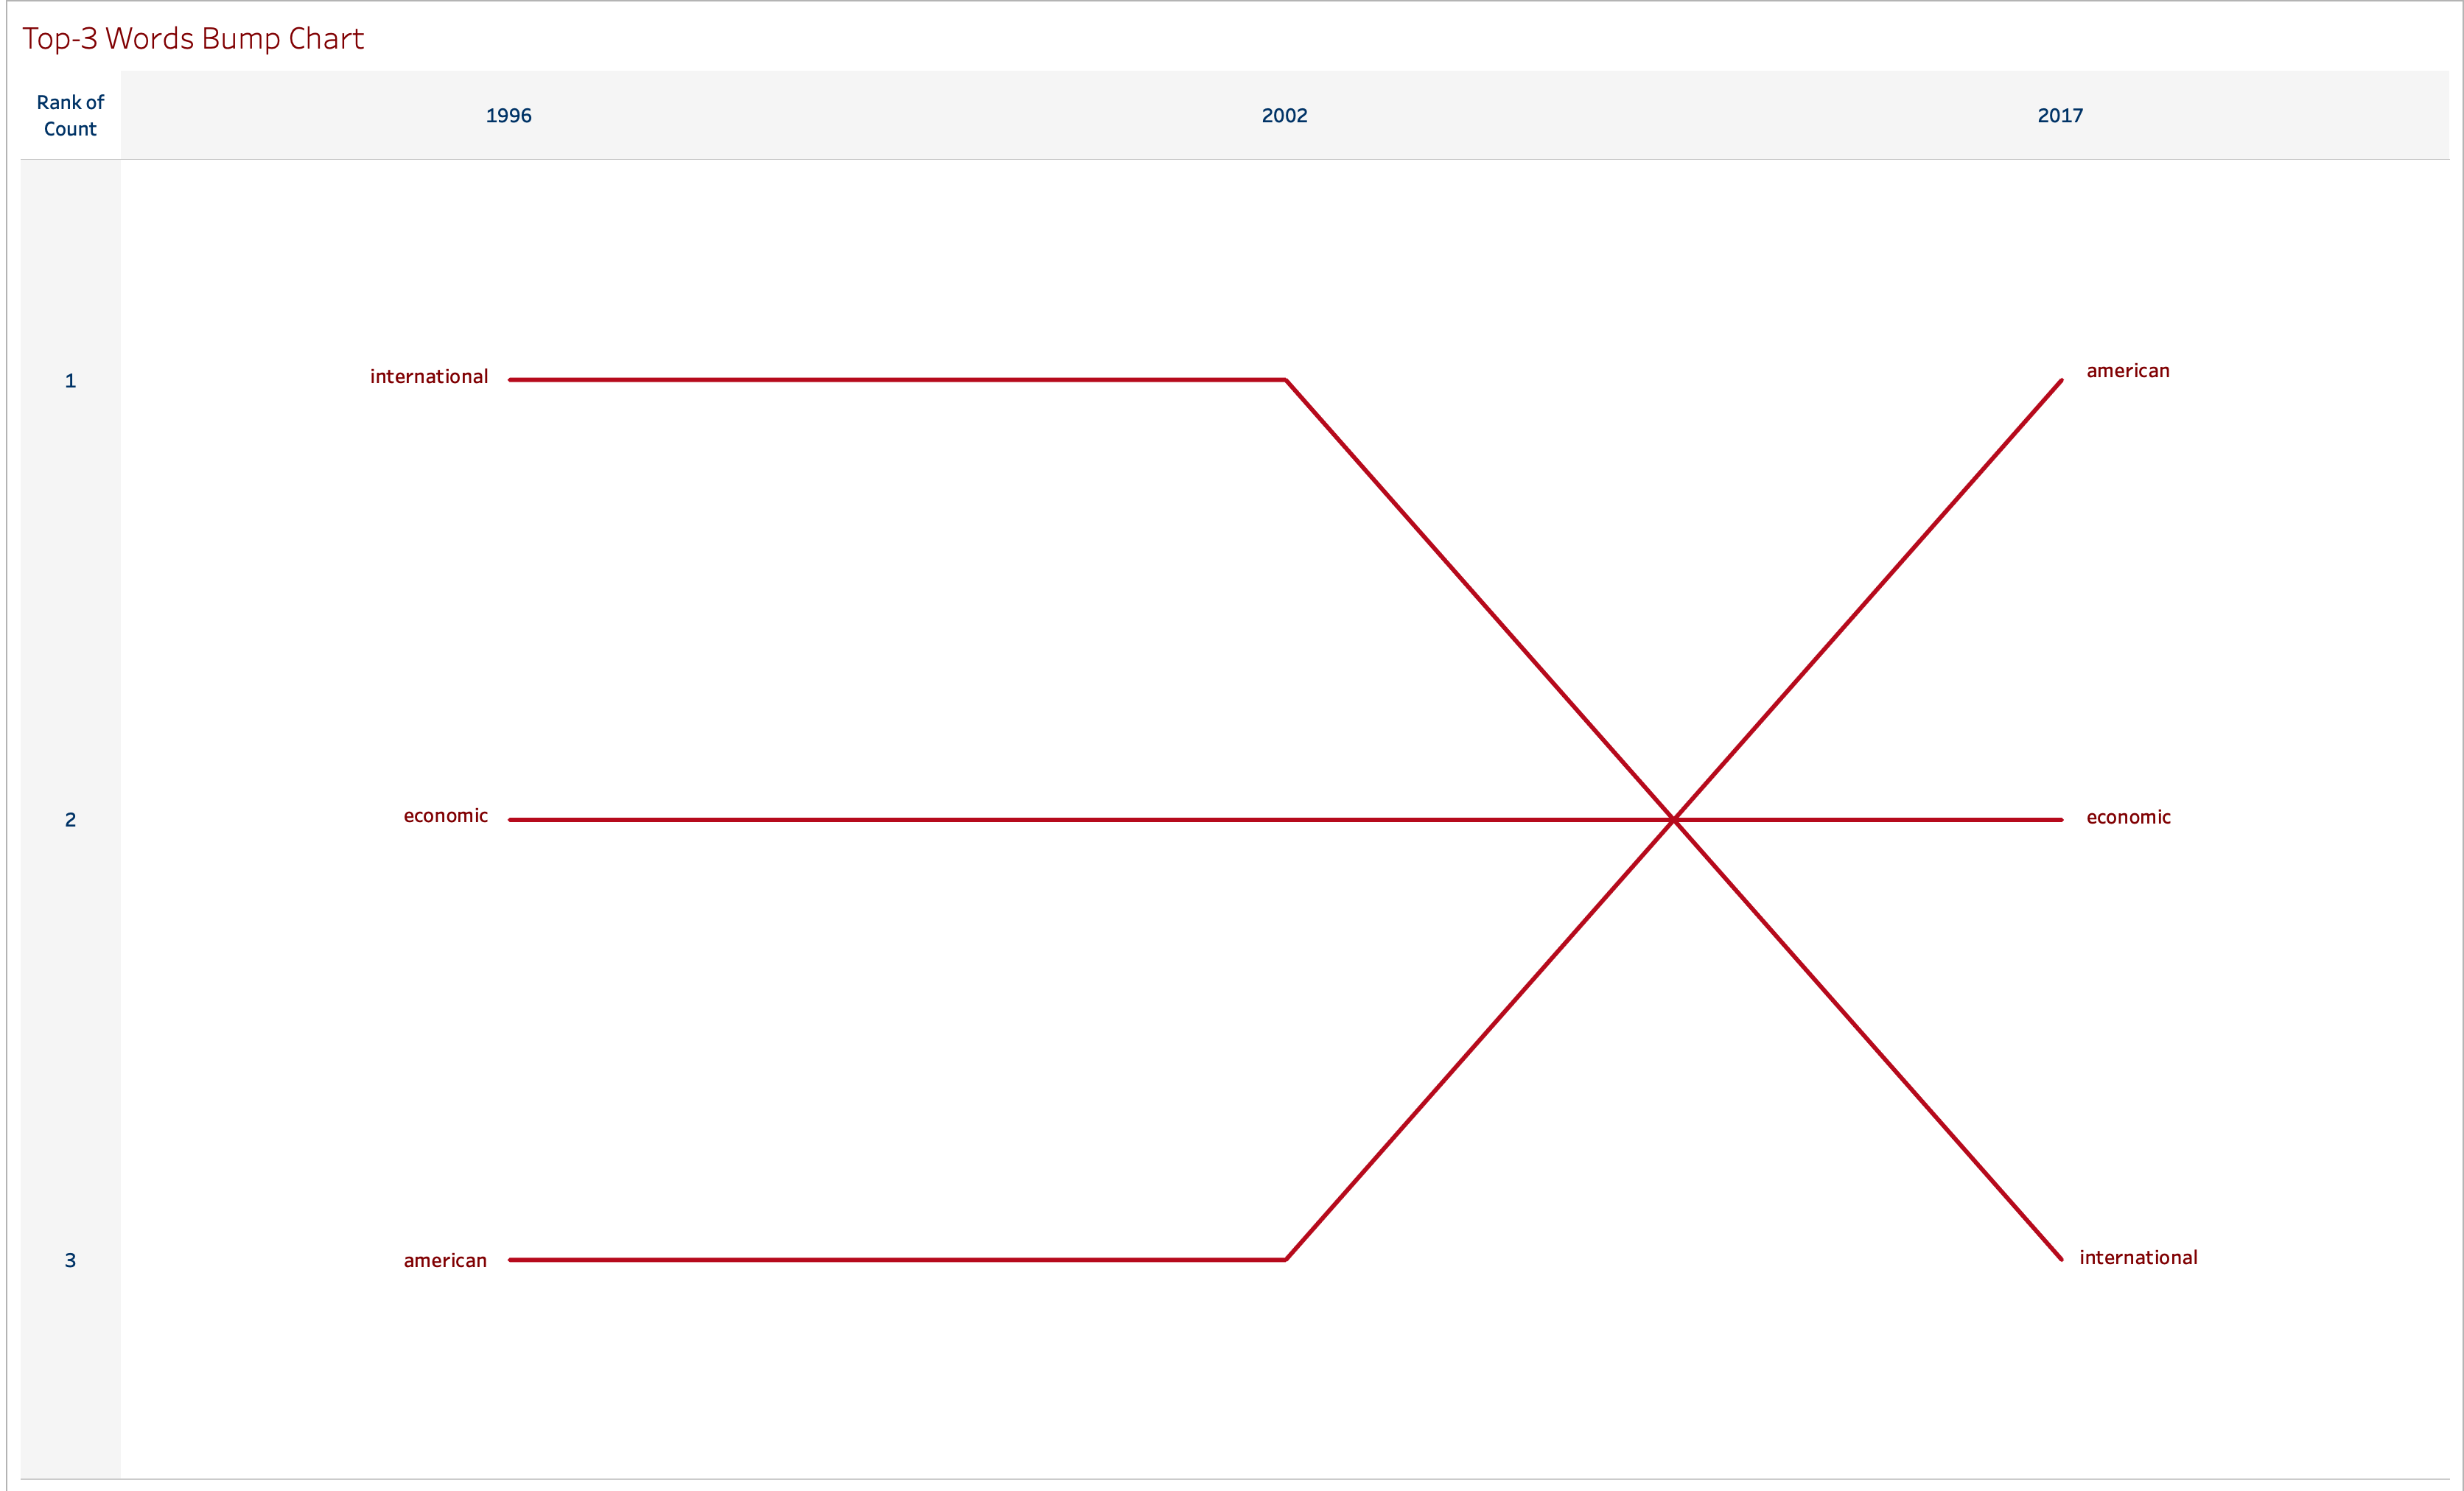

In [3]:
Image(filename='../GitHub/portfolio/text_analysis/images/image3.png', width= 840)

__Figure 1.2__
*In 2017 a shift in policies takes place.  The word “international” drops completely, moving from 134 to 0, and “American” gains importance and/or focus.*

Furthermore, an individual assessment of each NSS per year offers additional insights. For the 1996 strategy, while it certainly underlines words like international and economic, it also highlights security, peace, and support. Equally, there is an absence of other ranked words like energy, threats, weapons, partners, world, or development. Similarly, the 2002 strategy includes words like help, trade, global, word, and work, but lacks American, energy, improve and protect amid its top-ranked words. As an observation, one may look past strategies and extrapolate the absence of certain topics within present situations...

##### **Disclaimer:** The views expressed in this analysis are those of the authors, for educational purposes, and do not reflect the official policy or position of the National Security Council, Department of Defense, or the U.S. Government.)